<h2><i>Find Optimal Number of Clusters<i></h2>

<h3><i>Read Json file containing annotations<i></h2>

In [9]:
import pandas as pd
import json


# reading the JSON data using json.load()
file = 'C:\\Users\\siddharth\\Downloads\\via_export_coco.json'

with open(file) as train_file:
    dict_train = json.load(train_file)

<h3><i>View data<i></h2>

In [10]:
dict_train

{'info': {'year': 2020,
  'version': '1',
  'description': 'Exported using VGG Image Annotator (http://www.robots.ox.ac.uk/~vgg/software/via/)',
  'contributor': '',
  'url': 'http://www.robots.ox.ac.uk/~vgg/software/via/',
  'date_created': 'Sat Apr 18 2020 11:11:19 GMT+0530 (India Standard Time)'},
 'images': [{'id': 0,
   'width': 421,
   'height': 499,
   'file_name': 'dog.4001.jpg',
   'license': 1,
   'date_captured': ''},
  {'id': 1,
   'width': 400,
   'height': 362,
   'file_name': 'dog.4016.jpg',
   'license': 1,
   'date_captured': ''},
  {'id': 2,
   'width': 421,
   'height': 500,
   'file_name': 'dog.4017.jpg',
   'license': 1,
   'date_captured': ''},
  {'id': 3,
   'width': 499,
   'height': 375,
   'file_name': 'dog.4018.jpg',
   'license': 1,
   'date_captured': ''},
  {'id': 4,
   'width': 500,
   'height': 374,
   'file_name': 'dog.4019.jpg',
   'license': 1,
   'date_captured': ''},
  {'id': 5,
   'width': 384,
   'height': 344,
   'file_name': 'dog.4020.jpg',
   '

<h3><i>Create a Dataframe for YOLO input<i></h2>

In [50]:
dataset = dict()
dataset['Image'] = list()
dataset['Img-Width'] = list()
dataset['Img-Height'] = list()
dataset['Class'] = list()
dataset['Box-x'] = list()
dataset['Box-y'] = list()
dataset['Box-w'] = list()
dataset['Box-h'] = list()

In [51]:
for i in range(50):
    dataset['Image'].append(dict_train['images'][i]['file_name'])
    dataset['Img-Width'].append(dict_train['images'][i]['width'])
    dataset['Img-Height'].append(dict_train['images'][i]['height'])
    dataset['Class'].append('Dog')
    dataset['Box-x'].append(dict_train['annotations'][i]['bbox'][0])
    dataset['Box-y'].append(dict_train['annotations'][i]['bbox'][1])
    dataset['Box-w'].append(dict_train['annotations'][i]['bbox'][2])
    dataset['Box-h'].append(dict_train['annotations'][i]['bbox'][3])

In [52]:
# converting json dataset from dictionary to dataframe
train = pd.DataFrame.from_dict(dataset, orient='index')
train = train.T

In [57]:
train.head()

,Image,Img-Width,Img-Height,Class,Box-x,Box-y,Box-w,Box-h
0,dog.4001.jpg,421,499,Dog,107,56,221,437
1,dog.4016.jpg,400,362,Dog,59,35,284,234
2,dog.4017.jpg,421,500,Dog,23,20,333,429
3,dog.4018.jpg,499,375,Dog,193,87,207,284
4,dog.4019.jpg,500,374,Dog,1,181,188,182


<h3><i>Normalize the box coordinates<i></h2>

In [54]:
train_final = train.copy()

In [55]:
for i in range(len(train_final)):
    train_final['Box-x'][i] = round(train_final['Box-x'][i]/train_final['Img-Width'][i],2)
    train_final['Box-y'][i] = round(train_final['Box-y'][i]/train_final['Img-Height'][i],2)
    train_final['Box-w'][i] = round(train_final['Box-w'][i]/train_final['Img-Width'][i],2)
    train_final['Box-h'][i] = round(train_final['Box-h'][i]/train_final['Img-Height'][i],2)

In [60]:
train_final.head()

,Image,Img-Width,Img-Height,Class,Box-x,Box-y,Box-w,Box-h
0,dog.4001.jpg,421,499,Dog,0.25,0.11,0.52,0.88
1,dog.4016.jpg,400,362,Dog,0.15,0.1,0.71,0.65
2,dog.4017.jpg,421,500,Dog,0.05,0.04,0.79,0.86
3,dog.4018.jpg,499,375,Dog,0.39,0.23,0.41,0.76
4,dog.4019.jpg,500,374,Dog,0,0.48,0.38,0.49


<h3><i>Find Optimal Number of Clusters<i></h2>

In [61]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans

In [67]:
df = train_final[['Box-w','Box-h']]

[[0.49875    0.48833333]
 [1.23125    1.0475    ]
 [0.60055556 1.08277778]]


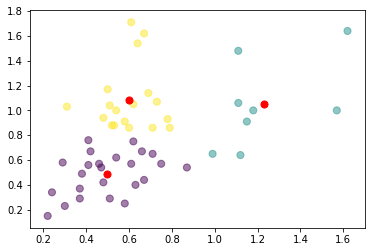

In [80]:
kmeans = KMeans(n_clusters=3).fit(df)
centroids = kmeans.cluster_centers_
print(centroids)

plt.scatter(df['Box-w'], df['Box-h'], c= kmeans.labels_.astype(float), s=50, alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50)
plt.show()

<h3><i>Use Elbow method to get optimal cluster<i></h2>

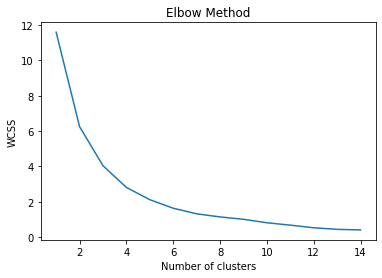

In [75]:
wcss = []
for i in range(1, 15):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=500, n_init=10, random_state=0)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 15), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

[[0.93       1.598     ]
 [0.45789474 0.43947368]
 [1.14142857 0.82857143]
 [0.59421053 0.91842105]]


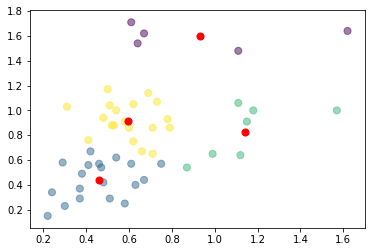

In [81]:
kmeans = KMeans(n_clusters=4).fit(df)
centroids = kmeans.cluster_centers_
print(centroids)

plt.scatter(df['Box-w'], df['Box-h'], c= kmeans.labels_.astype(float), s=50, alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50)
plt.show()

<h3><i>Optimal Number of Clusters seems to be 5<i></h2>

[[0.58352941 0.94882353]
 [0.755      0.575     ]
 [1.326      1.122     ]
 [0.7575     1.5875    ]
 [0.39285714 0.41071429]]


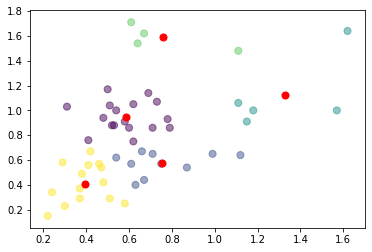

In [82]:
kmeans = KMeans(n_clusters=5).fit(df)
centroids = kmeans.cluster_centers_
print(centroids)

plt.scatter(df['Box-w'], df['Box-h'], c= kmeans.labels_.astype(float), s=50, alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50)
plt.show()